# Mini Projet - Prédiction des Prix des Maisons
## Dev-data P7 - Groupe 1

Ce notebook suit les étapes du projet : compréhension, collecte, nettoyage, analyse (univariée et bivariée avec interprétations), normalisation/encodage, entraînement de modèles simples et évaluation. Des interprétations et explications sont ajoutées pour chaque étape clé.

## 1. Compréhension du problème (prédiction)
L'objectif est de prédire le prix (**price**) des maisons en utilisant d'autres mesures (ex. : chambres, surface).
**Dataset :** 'kc_house_data.csv', ventes de maisons dans le comté de King (Seattle), mai 2014 - mai 2015.
Type : **régression** (prédire un nombre).

### Explication des variables
- **id** : Identifiant unique.
- **date** : Date de vente.
- **price** : Prix (cible).
- **bedrooms, bathrooms** : Pièces.
- **sqft_living, sqft_lot** : Surfaces.
- **floors** : Étages.
- **sqft_above, sqft_basement** : Détails surfaces.
- **yr_built, yr_renovated** : Années.
- **condition (1-5)** : État.
- **grade (1-13)** : Qualité.
- **waterfront (0/1)** : Vue eau.
- **view (0-4)** : Vue.
- **zipcode** : Code postal.
- **lat, long** : Coordonnées.
- **sqft_living15, sqft_lot15** : Moyennes voisins.

**Interprétation** : Le problème est une régression supervisée. Les features physiques (sqft_living) et qualitatives (grade) influenceront likely le prix. Localisation (zipcode) peut capturer des effets socio-économiques.

### Prérequis
Installation : `pip install pandas scikit-learn matplotlib numpy seaborn`

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

## 2. Collecte du dataset
**Explication** : Chargement du CSV. Vérification shape, nulls et info pour un aperçu initial.

In [17]:
df = pd.read_csv("kc_house_data.csv")
print(df.head(5))
print("Le nombre de lignes et de colonnes :", df.shape)
print("Le nombre de valeurs nulles est: ", df.isna().sum().sum())
print(df.info())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

## 3. Nettoyage (valeurs manquantes, doublons)
**Explication** : Pas de nulls/doublons. Remplacer yr_renovated=0 par yr_built (pas de rénovation). Supprimer id, date, lat, long (non utiles pour modèle simple).

**Interprétation** : Cela simplifie le dataset en gardant les features pertinentes. yr_renovated modifiée reflète l'âge effectif de la maison.

In [18]:
print('Valeurs manquantes :')
print(df.isnull().sum())
print('Doublons :', df.duplicated().sum())

df['yr_renovated'] = np.where(df['yr_renovated'] == 0, df['yr_built'], df['yr_renovated'])
df = df.drop(['id', 'date', 'lat', 'long'], axis=1)

print('\nDonnées après nettoyage :')
print(df.head())

Valeurs manquantes :
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
Doublons : 0

Données après nettoyage :
      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement

## Analyse Univariée
**Explication** : Séparation quantitative/qualitative. Stats descriptives, histos/boxplots (quant), countplots (qual).

### Variables Quantitatives
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'price'

### Variables Qualitatives
'waterfront', 'view', 'condition', 'grade', 'zipcode'

In [19]:
# Séparation
quantitative_vars = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
                     'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 
                     'sqft_living15', 'sqft_lot15']
qualitative_vars = ['waterfront', 'view', 'condition', 'grade', 'zipcode']

df_quant = df[quantitative_vars]
df_qual = df[qualitative_vars]

print('\nVariables quantitatives :')
print(df_quant.describe())

print('\nVariables qualitatives :')
for col in qualitative_vars:
    print(f'\n{col} unique values: {df[col].unique()}')
    print(df[col].value_counts())


Variables quantitatives :
              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       1.494309   1788.390691     291.509045   1971.005136   1973.386018   
std        0.539989  

**Interprétation des stats quantitatives** : Price moyen ~540k, max 7.7M (skewed). Bedrooms moyen 3.37, max 33 (outlier ?). Sqft_living moyen 2080, skewed vers petites maisons. Yr_built de 1900-2015, pic récent possible.

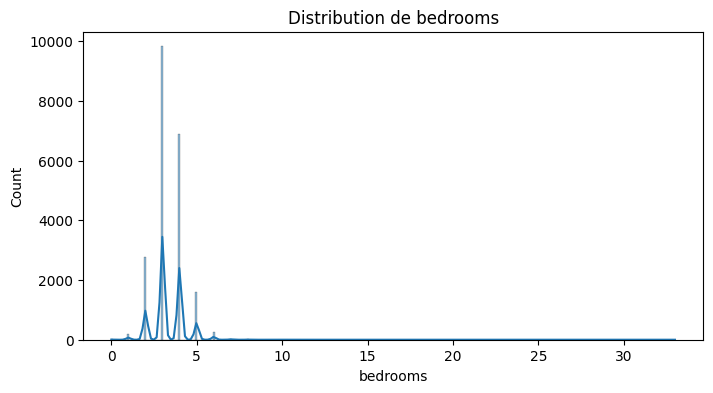

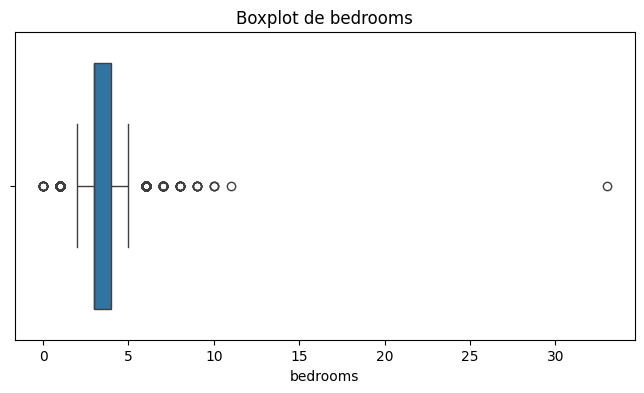

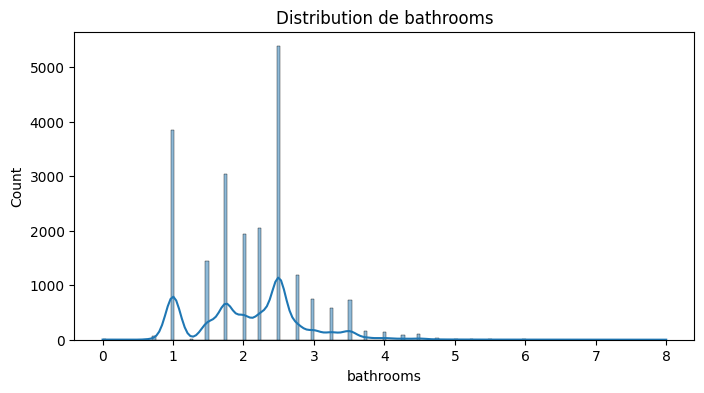

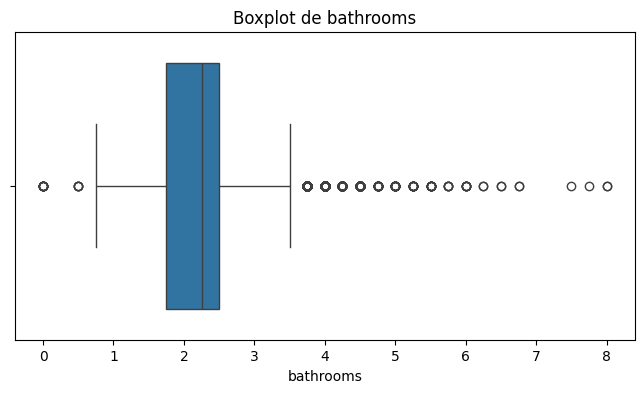

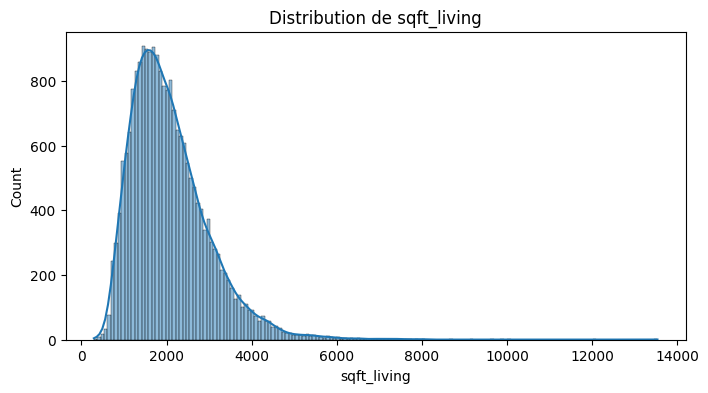

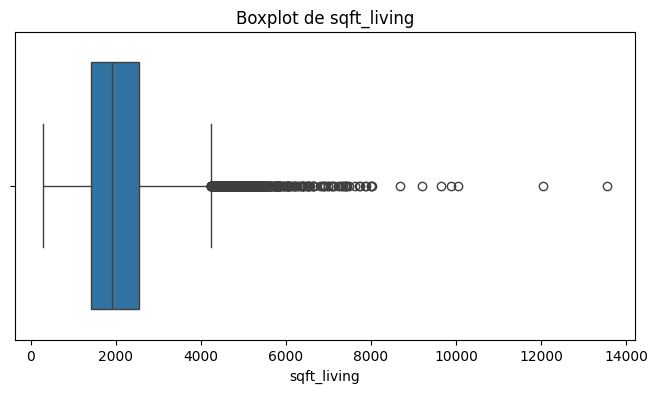

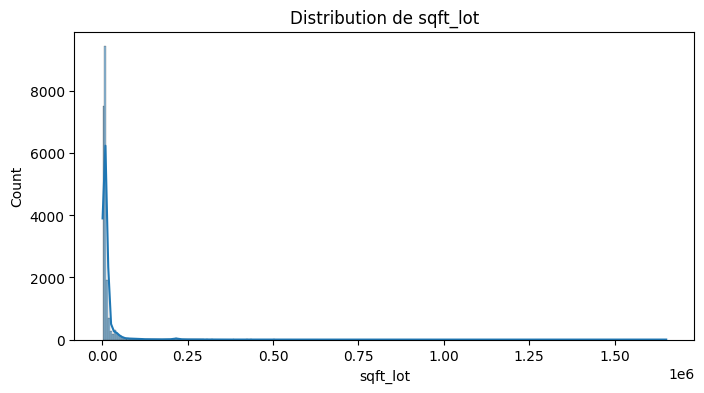

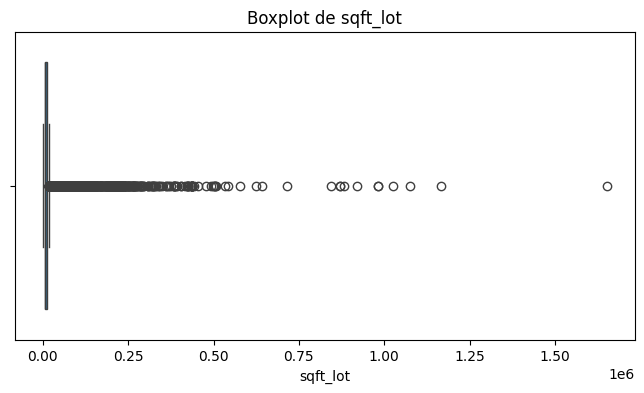

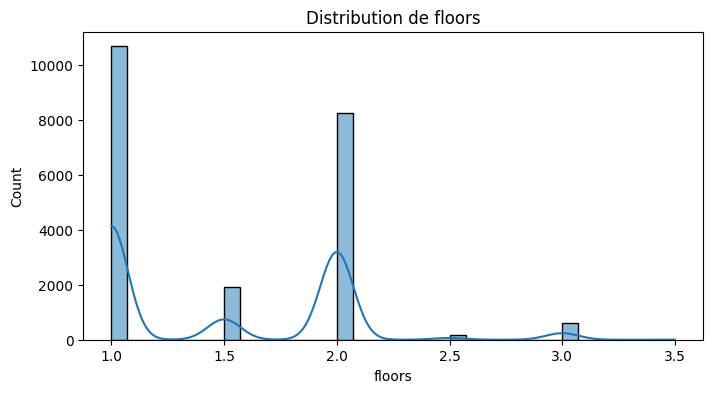

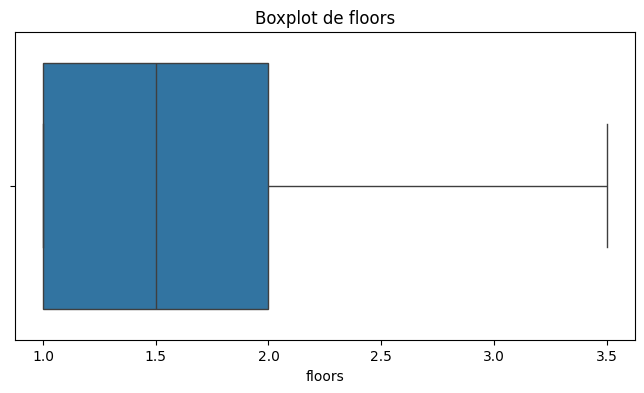

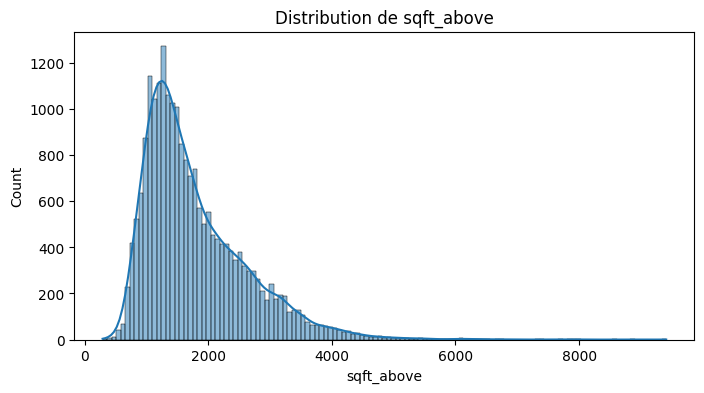

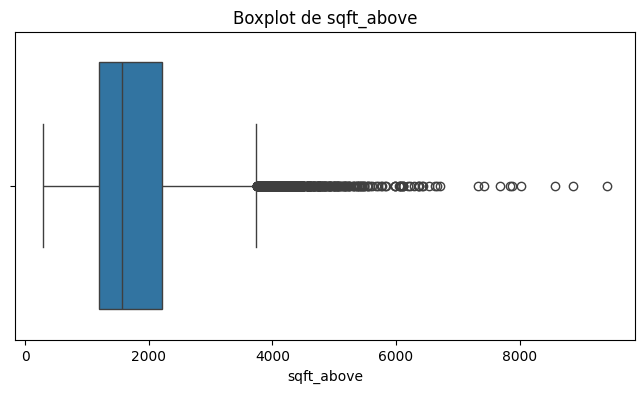

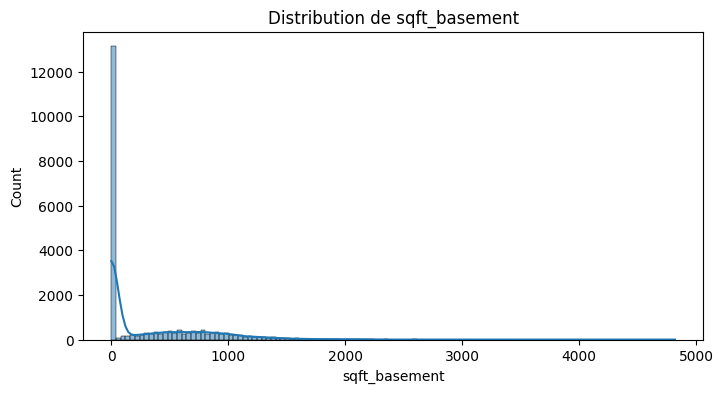

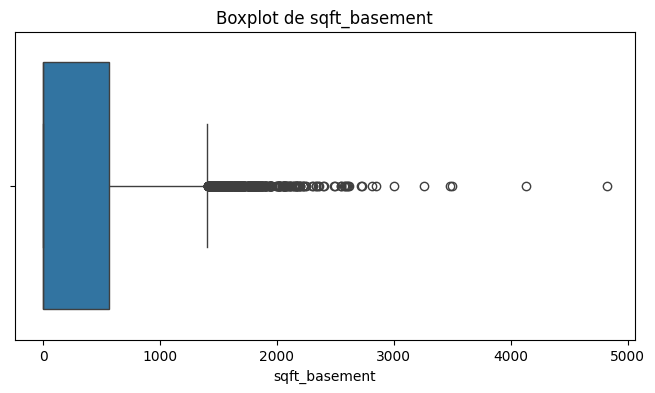

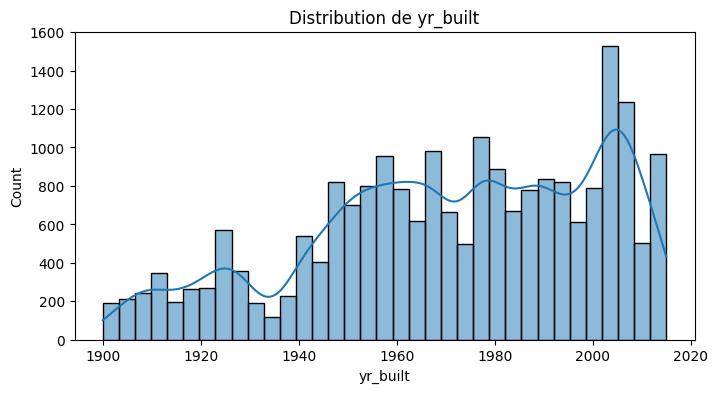

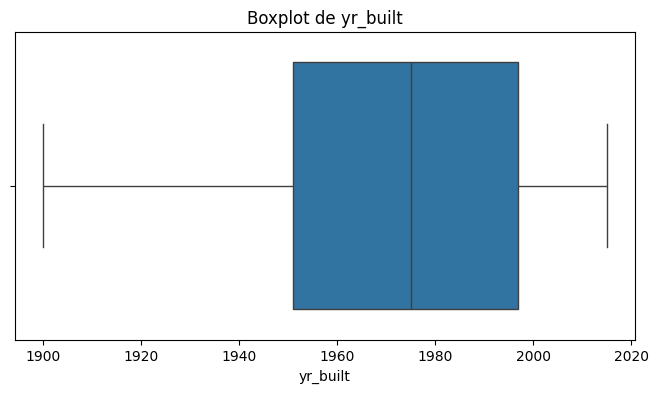

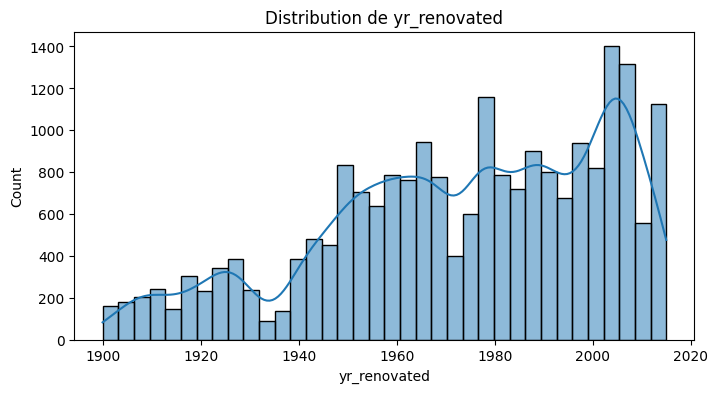

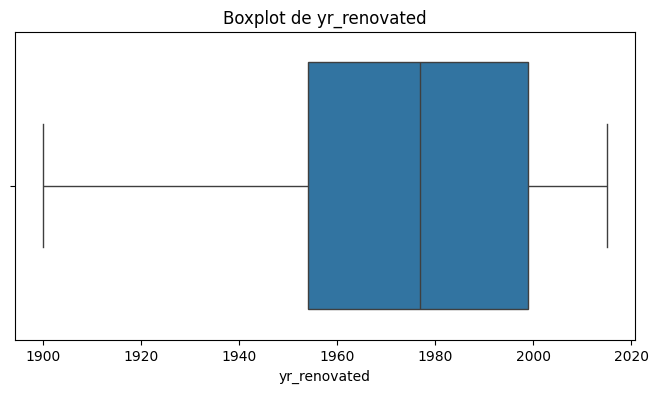

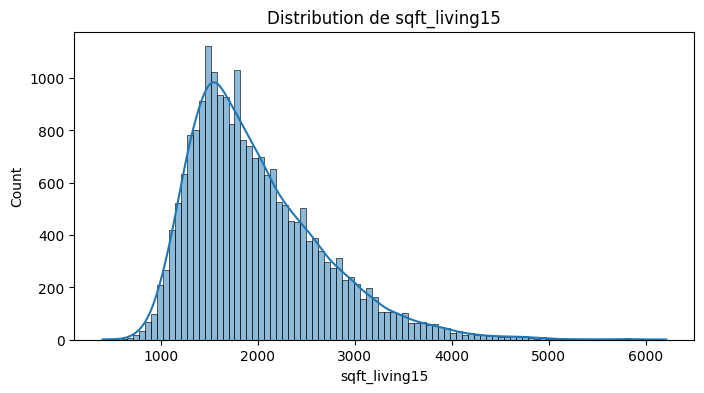

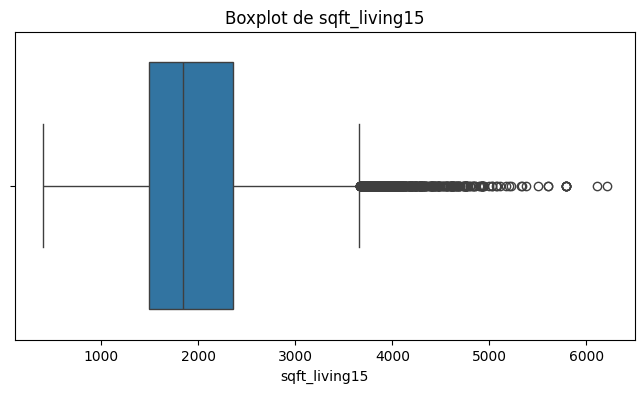

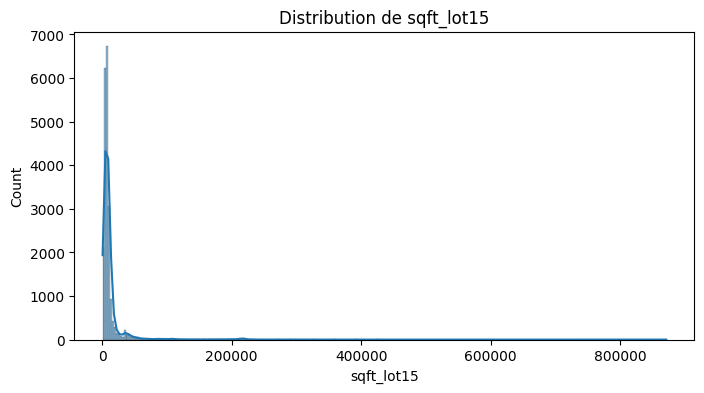

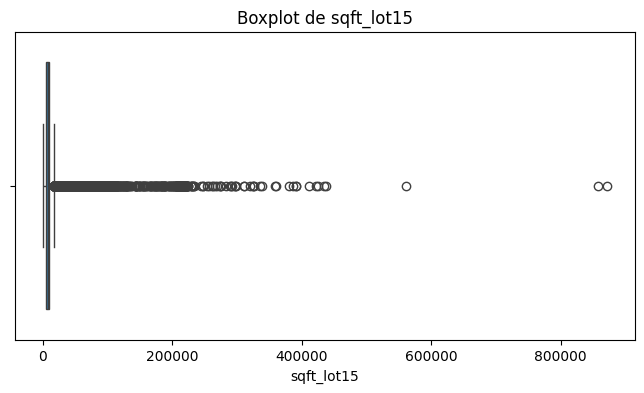

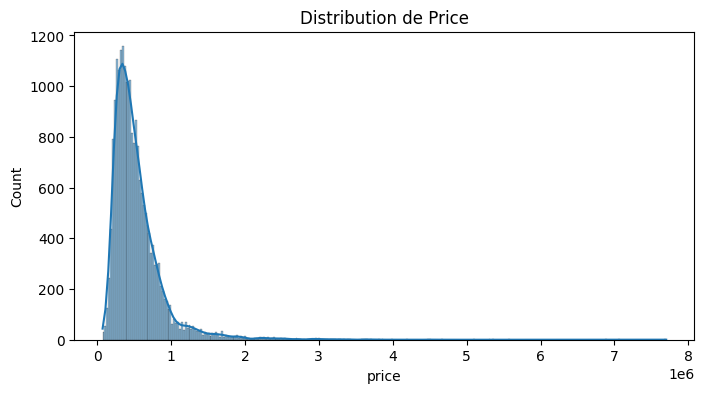

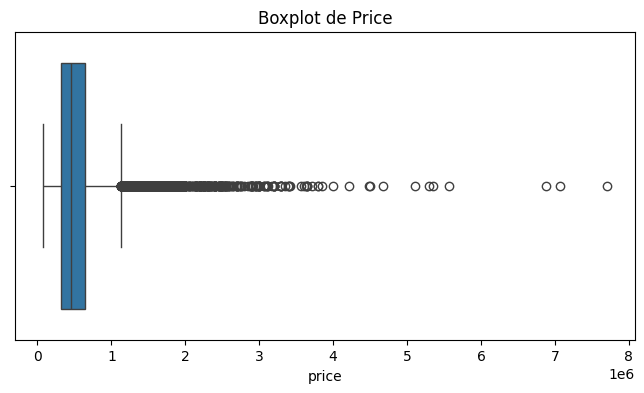

In [20]:
# Histos et Boxplots quant
for col in quantitative_vars[1:]:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution de {col}')
    plt.show()
    
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

plt.figure(figsize=(8,4))
sns.histplot(df['price'], kde=True)
plt.title('Distribution de Price')
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=df['price'])
plt.title('Boxplot de Price')
plt.show()

**Interprétation graphs quant** : Distributions skewed (price, sqft_lot) indiquent besoin de log-transform. Boxplots montrent outliers (ex. price >1M, bedrooms=33). Yr_built bimodal (vieux/neufs).

/tmp/ipykernel_229972/1525852432.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')


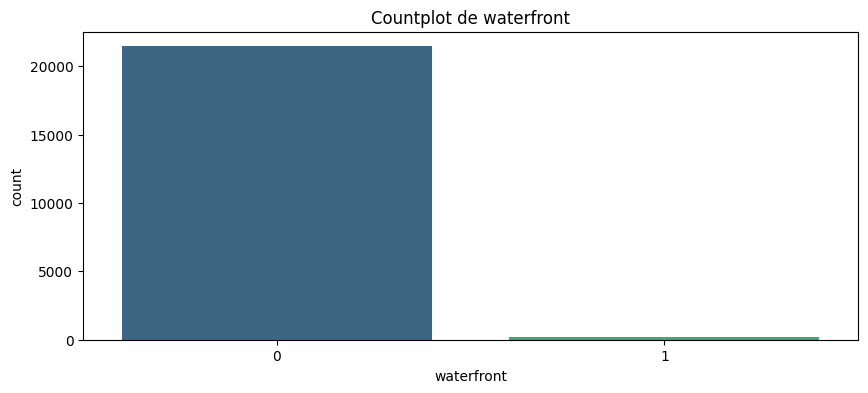

/tmp/ipykernel_229972/1525852432.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')


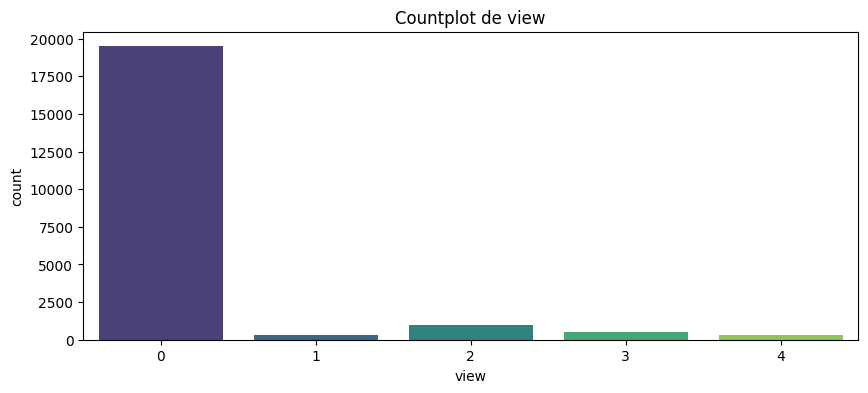

/tmp/ipykernel_229972/1525852432.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')


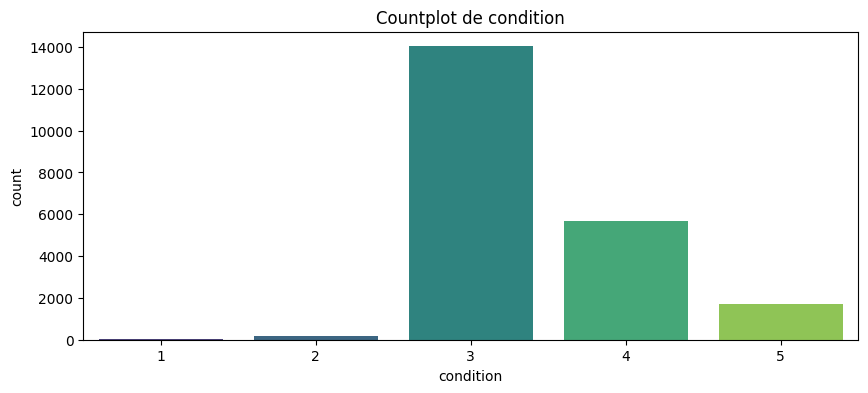

/tmp/ipykernel_229972/1525852432.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')


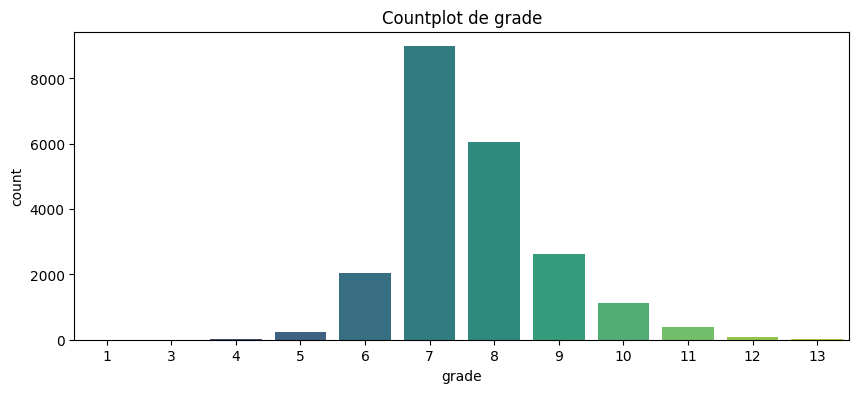

/tmp/ipykernel_229972/1525852432.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')


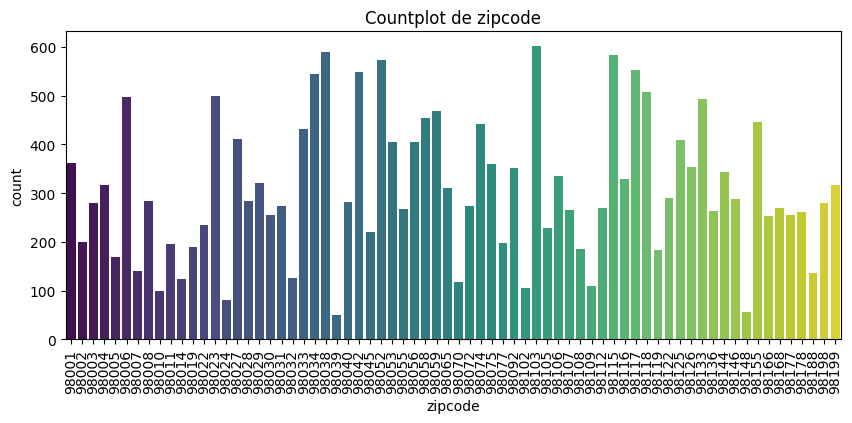

In [21]:
# Countplots qual
for col in qualitative_vars:
    plt.figure(figsize=(10,4))
    sns.countplot(x=df[col], palette='viridis')
    plt.title(f'Countplot de {col}')
    if col == 'zipcode':
        plt.xticks(rotation=90)
    plt.show()

**Interprétation graphs qual** : Waterfront rare (0 majoritaire). View=0 dominant. Condition/grade normaux (moyenne 3/7). Zipcode varié, certains plus fréquents (zones denses).

## Analyse Bivariée
**Explication** : Relations avec price. Heatmap/Scatter (quant), Boxplots (qual), Pairplot top corr.

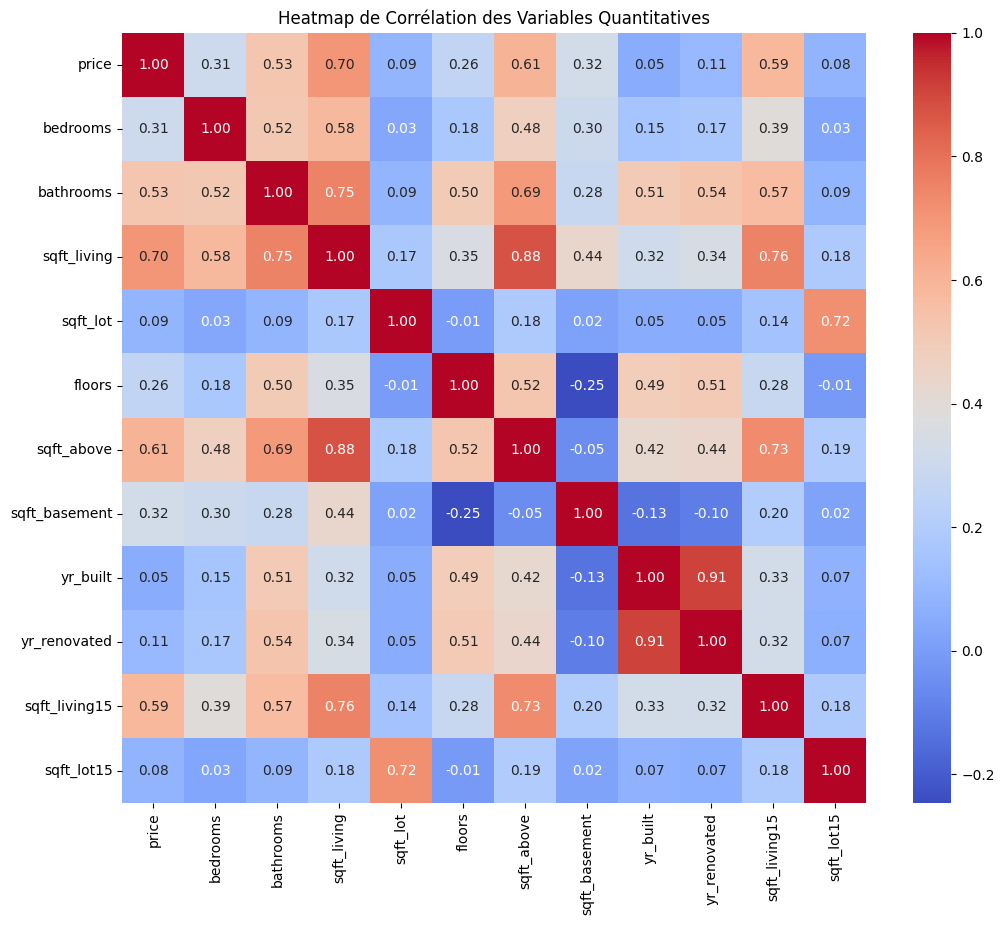

In [22]:
# Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df_quant.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de Corrélation des Variables Quantitatives')
plt.show()

**Interprétation heatmap** : Forte corr price-sqft_living (0.70), grade (0.67), bathrooms (0.53). Multicolinéarité sqft_living-sqft_above (0.88). Yr_built corr faible (0.05), localisation plus importante ?

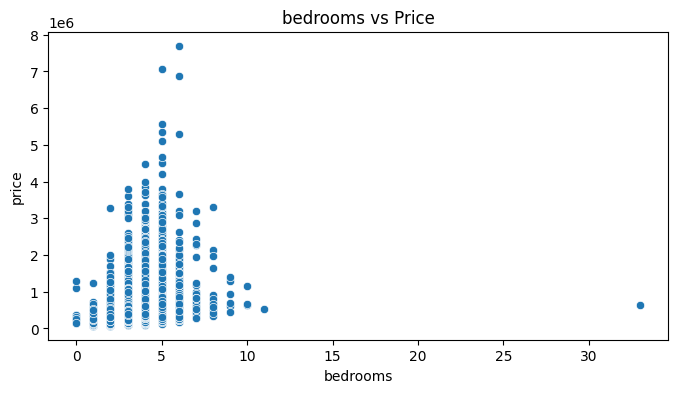

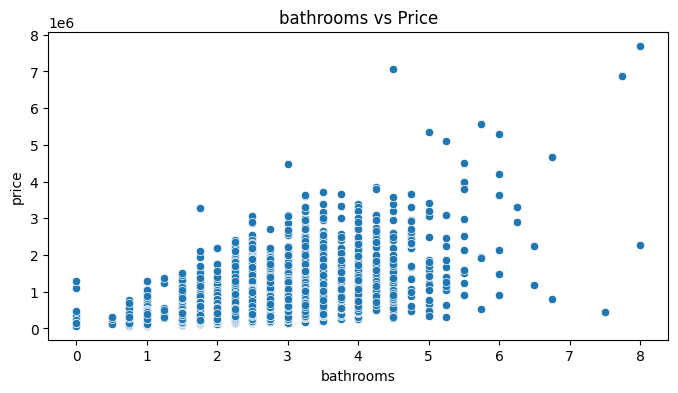

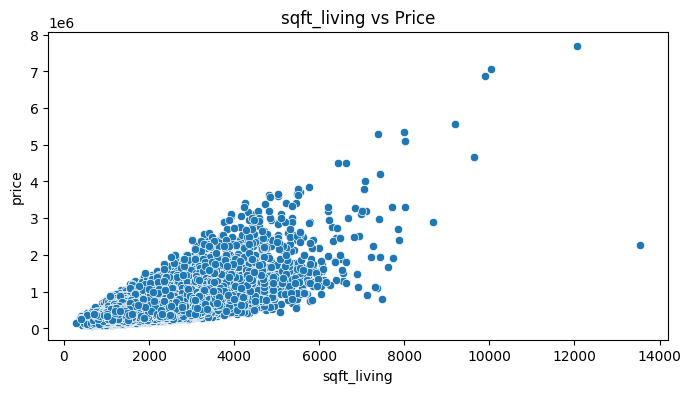

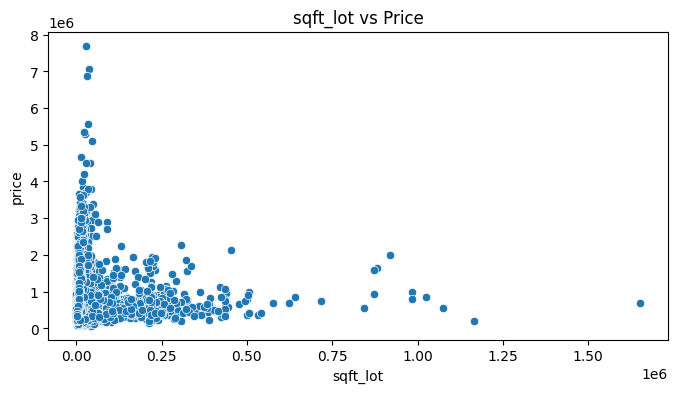

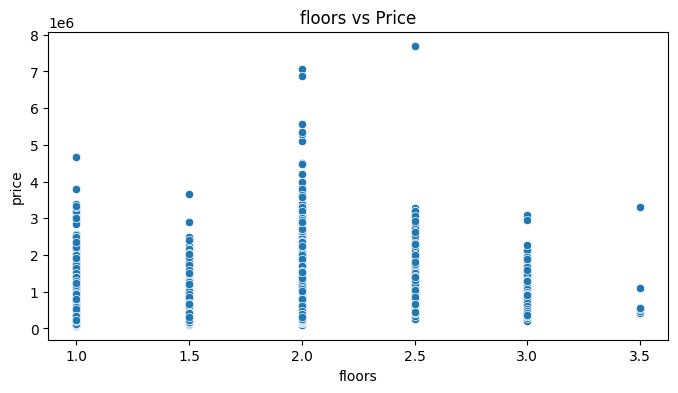

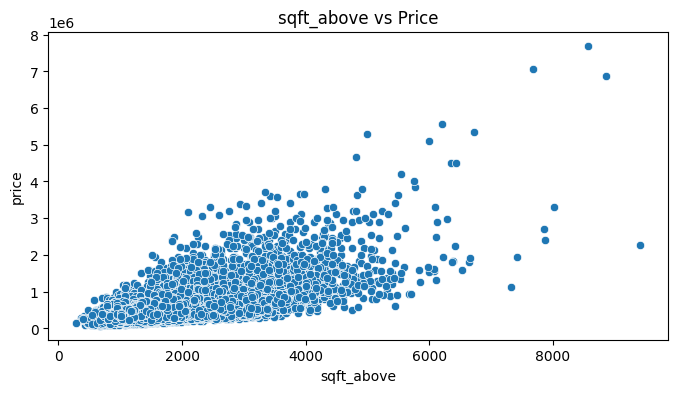

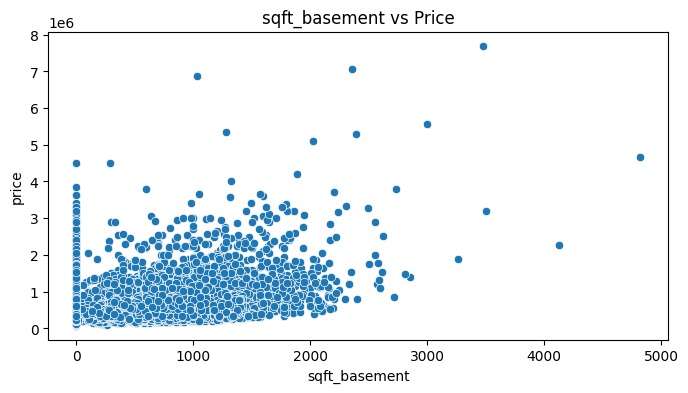

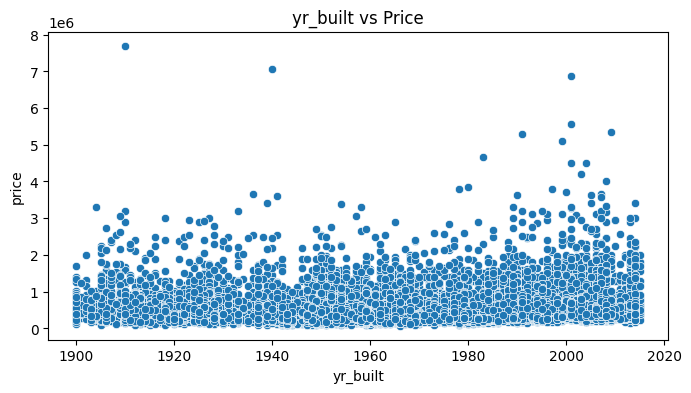

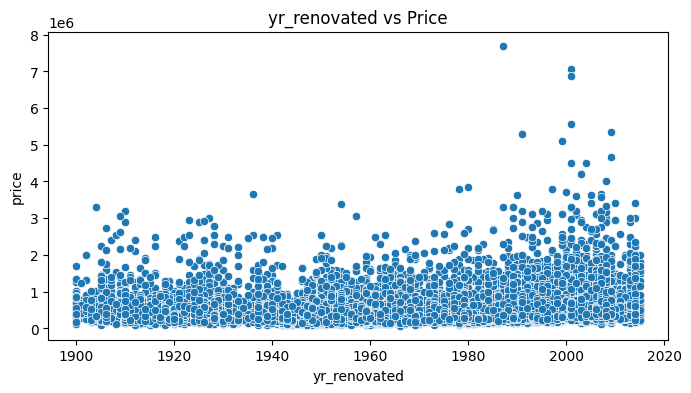

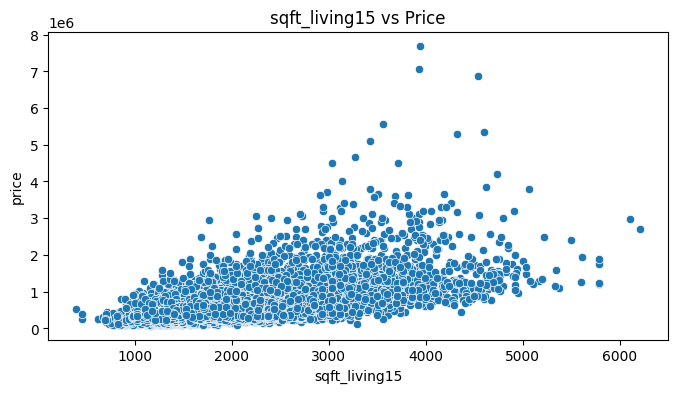

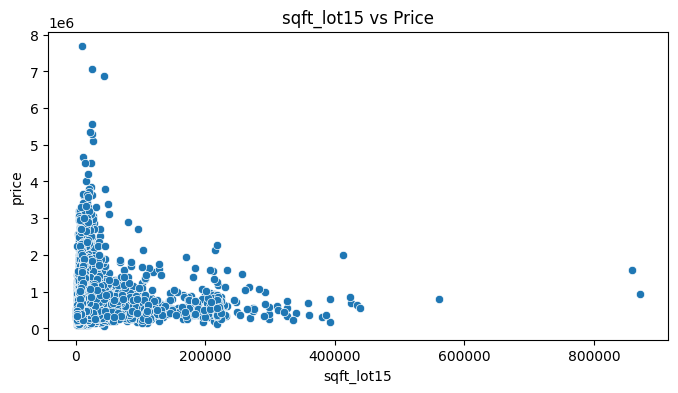

In [23]:
# Scatter vs price
for col in quantitative_vars[1:]:
    plt.figure(figsize=(8,4))
    sns.scatterplot(x=df[col], y=df['price'])
    plt.title(f'{col} vs Price')
    plt.show()

**Interprétation scatters** : Relation linéaire positive sqft_living/price. Outliers visibles (ex. grande maison bas prix). Yr_built montre prix plus hauts pour récentes.

/tmp/ipykernel_229972/397634607.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price'], palette='viridis')


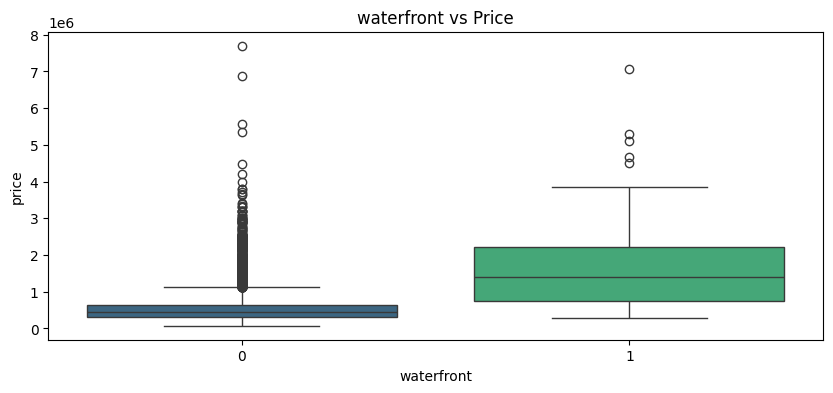

/tmp/ipykernel_229972/397634607.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price'], palette='viridis')


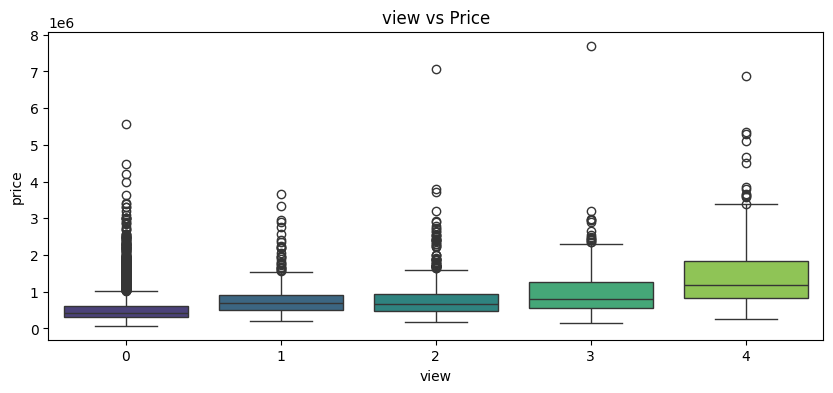

/tmp/ipykernel_229972/397634607.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price'], palette='viridis')


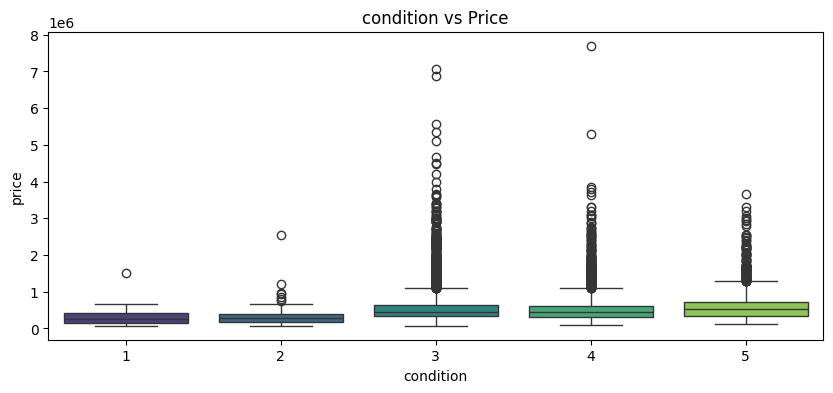

/tmp/ipykernel_229972/397634607.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price'], palette='viridis')


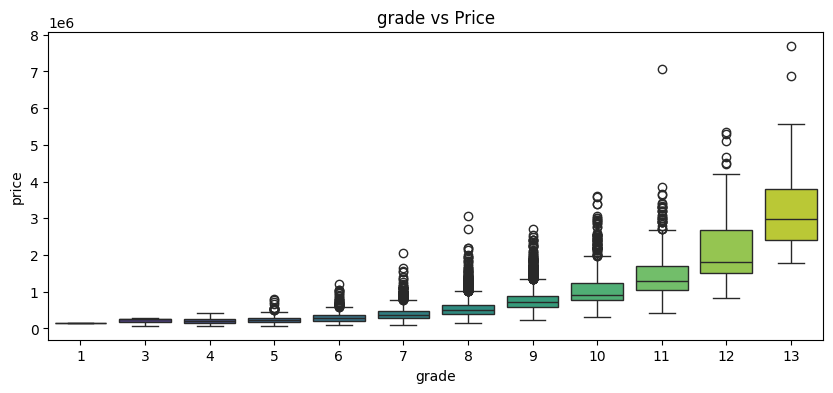

/tmp/ipykernel_229972/397634607.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price'], palette='viridis')


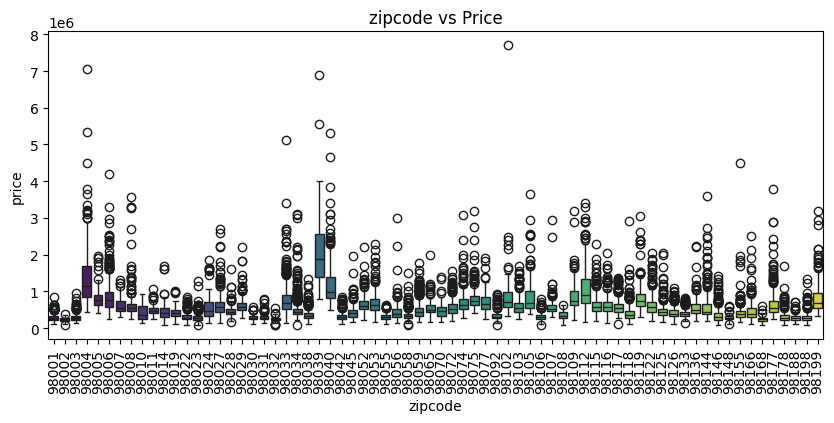

In [24]:
# Boxplots vs price
for col in qualitative_vars:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df[col], y=df['price'], palette='viridis')
    plt.title(f'{col} vs Price')
    if col == 'zipcode':
        plt.xticks(rotation=90)
    plt.show()

**Interprétation boxplots** : Waterfront=1 prix plus hauts. View/grade augmentent médiane price. Condition mixte. Zipcode variations fortes (ex. 98039 cher).

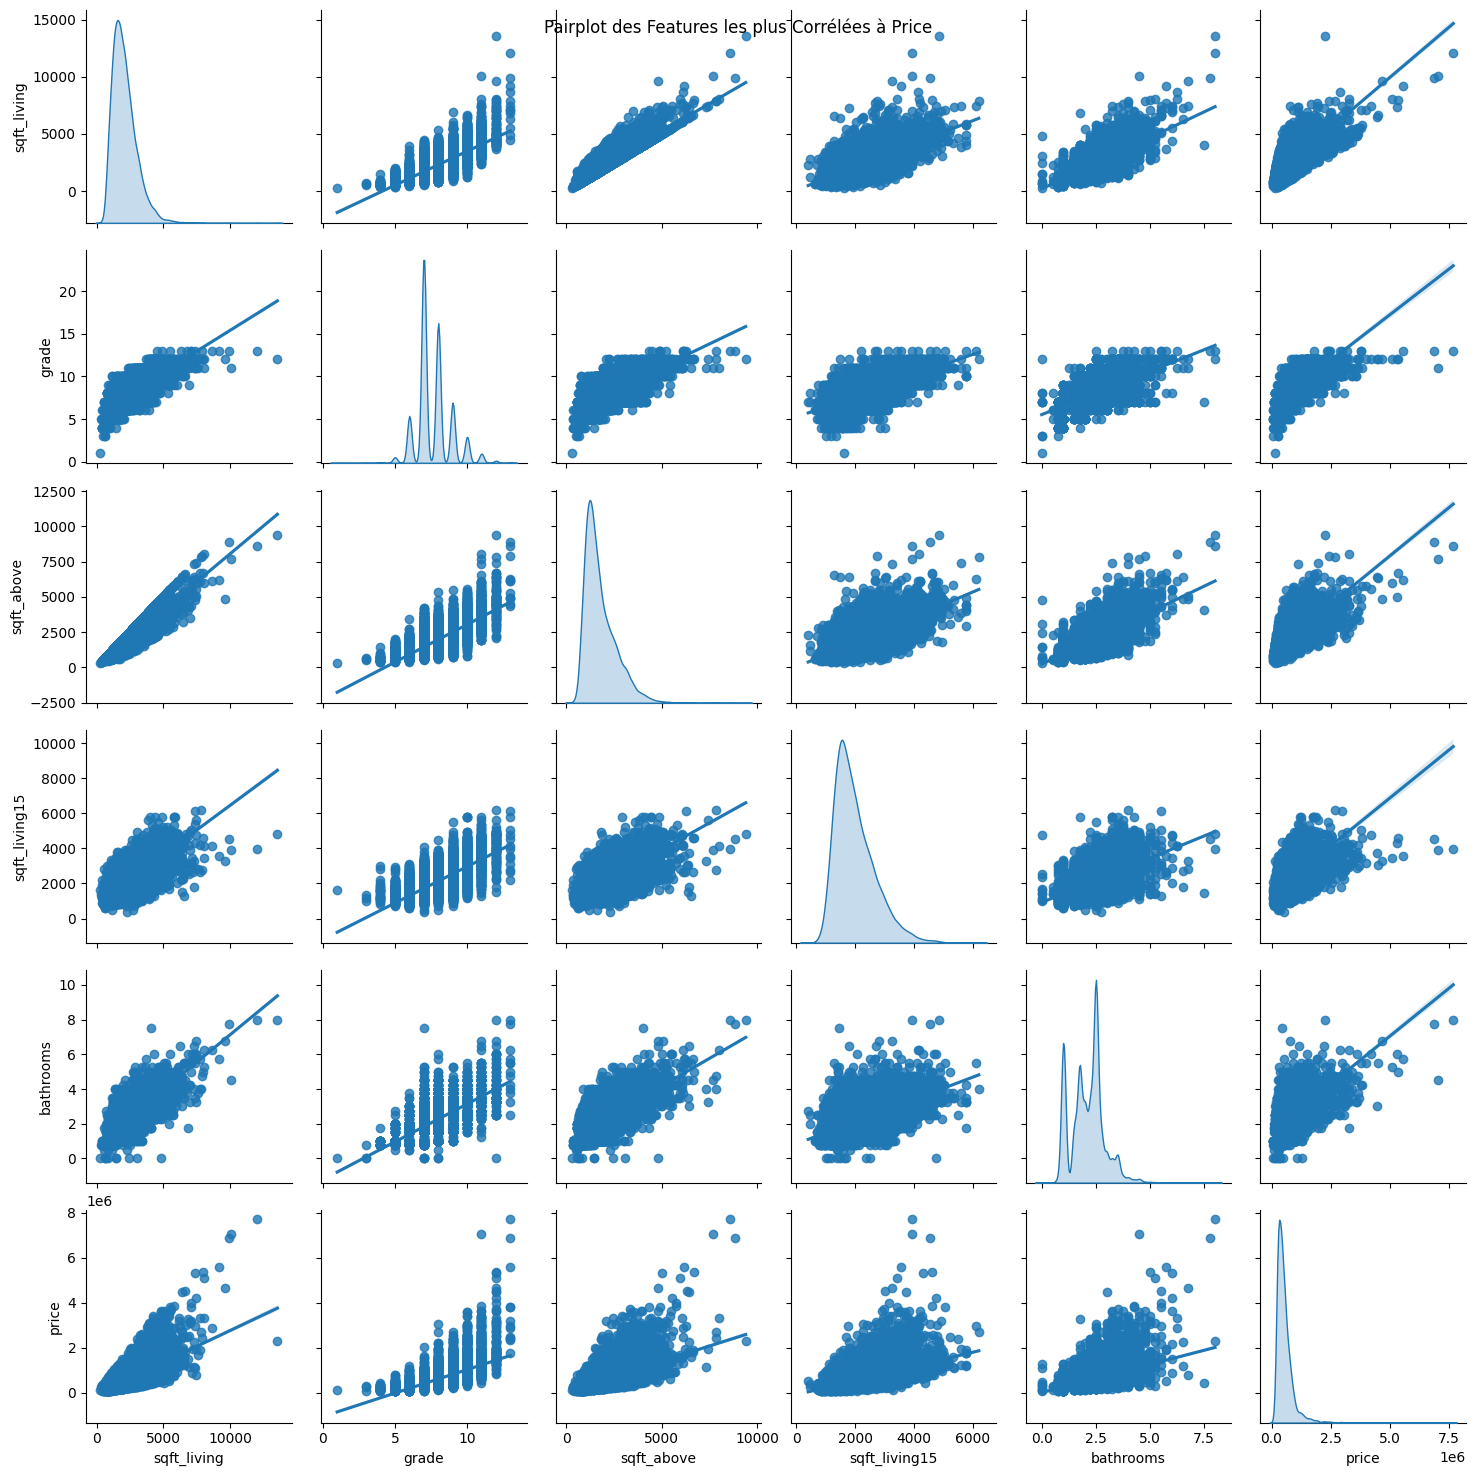

In [25]:
# Pairplot top
top_corr_features = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']
sns.pairplot(df[top_corr_features + ['price']], kind='reg', diag_kind='kde')
plt.suptitle('Pairplot des Features les plus Corrélées à Price')
plt.show()

**Interprétation pairplot** : Confirmé relations linéaires. Colinéarité entre top features (ex. sqft_living-bathrooms), suggère feature selection pour éviter overfitting.

## Gestion des outliers et transformation
**Explication** : Supprimer outliers IQR (price, sqft_living). Log-price pour normaliser.

**Interprétation** : Réduit impact extremes (luxe). Log aide régression linéaire (assume normalité).

Shape après outliers : (20147, 17)


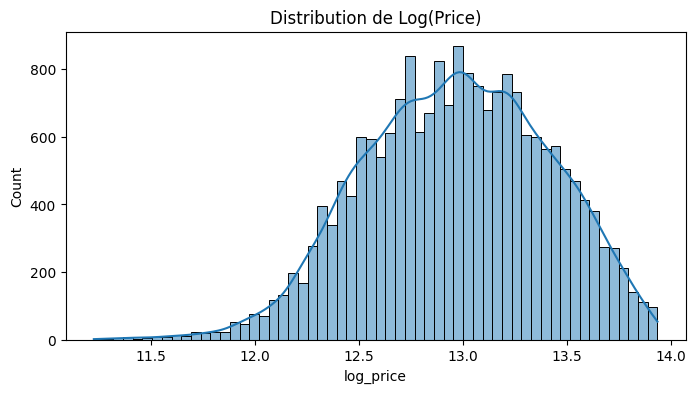

In [26]:
# Outliers price
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR)))]

# Outliers sqft_living
Q1_sqft = df['sqft_living'].quantile(0.25)
Q3_sqft = df['sqft_living'].quantile(0.75)
IQR_sqft = Q3_sqft - Q1_sqft
df = df[~((df['sqft_living'] < (Q1_sqft - 1.5 * IQR_sqft)) | (df['sqft_living'] > (Q3_sqft + 1.5 * IQR_sqft)))]

print('Shape après outliers :', df.shape)

# Log
df['log_price'] = np.log(df['price'])
plt.figure(figsize=(8,4))
sns.histplot(df['log_price'], kde=True)
plt.title('Distribution de Log(Price)')
plt.show()

target = df['log_price']
df.drop(['price', 'log_price'], axis=1, inplace=True)

## 4. Normalisation / encodage simple des variables
**Explication** : One-hot qual (zipcode ajoute colonnes). StandardScaler quant.

**Interprétation** : Encodage gère catégories. Normalisation centre/échelle, aide KNN/sensibilité échelle.

In [27]:
df_encoded = pd.get_dummies(df, columns=qualitative_vars, drop_first=True)

scaler = StandardScaler()
quant_cols = [col for col in df_encoded.columns if col in quantitative_vars[1:]]
df_encoded[quant_cols] = scaler.fit_transform(df_encoded[quant_cols])

print('Data après :')
print(df_encoded.head())

Data après :
   bedrooms  bathrooms  sqft_living  sqft_lot    floors  sqft_above  \
0 -0.345819  -1.492943    -1.060956 -0.220450 -0.874596   -0.728870   
1 -0.345819   0.319397     0.888360 -0.178417  0.988626    0.723325   
2 -1.454013  -1.492943    -1.635934 -0.105599 -0.874596   -1.330284   
3  0.762375   1.406801     0.032905 -0.237612 -0.874596   -0.919562   
4 -0.345819  -0.043071    -0.359763 -0.156292 -0.874596    0.004562   

   sqft_basement  yr_built  yr_renovated  sqft_living15  ...  zipcode_98146  \
0      -0.655925 -0.529941     -0.613692      -0.954692  ...          False   
1       0.354564 -0.667078      0.642115      -0.359318  ...          False   
2      -0.655925 -1.284194     -1.381129       1.392783  ...          False   
3       1.642938 -0.187099     -0.264856      -0.920671  ...          False   
4      -0.655925  0.567154      0.502581      -0.172200  ...          False   

   zipcode_98148  zipcode_98155  zipcode_98166  zipcode_98168  zipcode_98177  \
0    

## 5. Entraînement d’un modèle très simple (régression linéaire ou k-NN)
**Explication** : Split 80/20. LinearReg (linéaire), KNN (proximité).

In [28]:
X = df_encoded
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

## 6. Évaluation basique
**Explication** : MSE/R² (régression, pas accuracy).

**Interprétation** : R² haut = bon fit (ex. 0.8 = 80% variance expliquée). MSE bas = erreurs petites. LR better pour linéarités, KNN pour non-lin.

Linear Regression:
MSE: 0.03171328382184101
R²: 0.8374310087907569

KNN:
MSE: 0.057825859775543706
R²: 0.7035724290701486


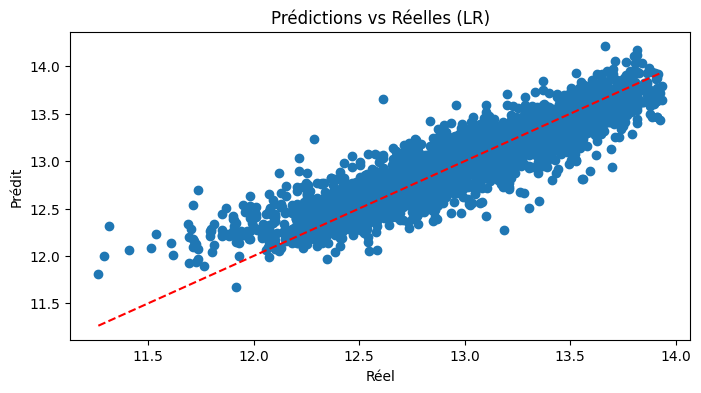

In [29]:
print('Linear Regression:')
print('MSE:', mean_squared_error(y_test, y_pred_lr))
print('R²:', r2_score(y_test, y_pred_lr))

print('\nKNN:')
print('MSE:', mean_squared_error(y_test, y_pred_knn))
print('R²:', r2_score(y_test, y_pred_knn))

plt.figure(figsize=(8,4))
plt.scatter(y_test, y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Prédictions vs Réelles (LR)')
plt.xlabel('Réel')
plt.ylabel('Prédit')
plt.show()

**Interprétation graph** : Points près ligne = bonnes préds. Déviations basses = sous-estimation, hautes = sur-estimation.

In [30]:
from sklearn.metrics import r2_score

r2_lr = r2_score(y_test, y_pred_lr) * 100
r2_knn = r2_score(y_test, y_pred_knn) * 100

print(f"Précision (R²) Régression Linéaire : {r2_lr:.2f}%")
print(f"Précision (R²) k-NN : {r2_knn:.2f}%")

Précision (R²) Régression Linéaire : 83.74%
Précision (R²) k-NN : 70.36%
